<h1 id="tocheading">Table of Contents</h1>
<br />
<div id="toc"><ul class="toc"><li><a href="#1.-Read-in-the-data">1. Read in the data</a><a class="anchor-link" href="#1.-Read-in-the-data">¶</a></li><li><a href="#2.-Comparing-across-all-degrees">2. Comparing across all degrees</a><a class="anchor-link" href="#2.-Comparing-across-all-degrees">¶</a></li><li><a href="#3.-Hiding-x-axis-labels">3. Hiding x-axis labels</a><a class="anchor-link" href="#3.-Hiding-x-axis-labels">¶</a></li><li><a href="#4.-Setting-y-axis-labels">4. Setting y-axis labels</a><a class="anchor-link" href="#4.-Setting-y-axis-labels">¶</a></li><li><a href="#5.-Adding-a-horizontal-line">5. Adding a horizontal line</a><a class="anchor-link" href="#5.-Adding-a-horizontal-line">¶</a></li><li><a href="#6.-Exporting-to-a-file">6. Exporting to a file</a><a class="anchor-link" href="#6.-Exporting-to-a-file">¶</a></li><li><a href="#Note:-Access-and-adjust-matplotlib-backend">Note: Access and adjust matplotlib backend</a><a class="anchor-link" href="#Note:-Access-and-adjust-matplotlib-backend">¶</a></li></ul></div>

Project guide: https://www.dataquest.io/m/149/guided-project%3A-visualizing-the-gender-gap-in-college-degrees/6/exporting-to-a-file

Solution by DataQuest: https://github.com/dataquestio/solutions/blob/master/Mission149Solutions.ipynb


This is a guided project by DataQuest, intended for data visualisation tailored for better story telling. This goal will be achieved by removing chartjunks.

I carry out this project for a practice purpose although I consider that the cleaning is excessive.

Data is from http://bit.ly/2zUi6gs. It shows percentage of females in subjects of bachelor's degrees.

# 1. Read in the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

women_degrees = pd.read_csv("percent-bachelors-degrees-women-usa.csv")
display(women_degrees.head())

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
0,1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1,1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
2,1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1
3,1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.4,73.501814,1.6,62.941502,74.9,77.4,40.9,16.5,50.4,64.3,36.4
4,1974,14.074623,17.444688,61.9,32.996183,16.204850,40.5,18.9,73.336811,2.2,62.413412,75.3,77.9,41.8,18.2,52.6,66.1,37.3


# 2. Comparing across all degrees

Modify the code from Step 1 to plot all subjects in 6 rows and 3 columns.

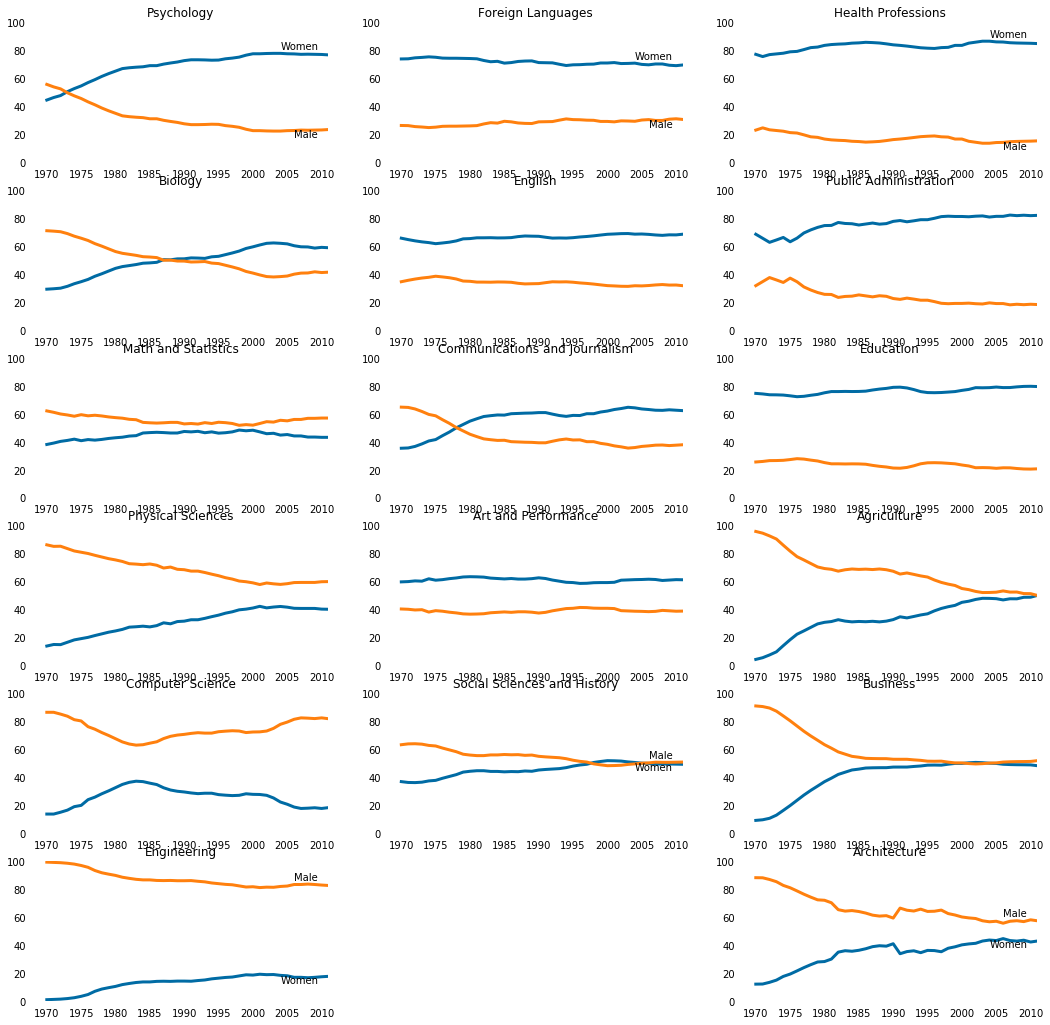

In [2]:
# get year column
year = women_degrees["Year"]

# categories of subjects
stem_cats = ['Psychology', 'Biology', 'Math and Statistics', \
             'Physical Sciences', 'Computer Science', 'Engineering']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', \
                 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', \
              'Agriculture','Business', 'Architecture']

# get last values for each category
stem_cats_lastVal = []
for i in stem_cats:
    lastVal_gendergap = abs(100 - ((women_degrees[i].tail(1).values) * 2))
    stem_cats_lastVal.append((i, lastVal_gendergap))

# sort stem_cats_lastVal (source https://stackoverflow.com/a/3121985/7194743)
stem_cats_lastVal = sorted(stem_cats_lastVal, key=lambda tup: tup[1], reverse=True)

# set line appearance
color_max = 255
women_color = tuple([i / color_max for i in [0, 107, 164]])
men_color = tuple([i / color_max for i in [255, 128, 14]])
linewidth = 3

# set figure dimensions
numRows = len(stem_cats)
numCols = 3

# crate a figure
fig = plt.figure(figsize=(18, 18))
# iterate over the length of subjects

for i in range(numRows * numCols):
    
    ind = i // numCols
    
    cat = None
    # get data to plot
    if i % 3 == 0:
        cat = stem_cats
    if i % 3 == 1:
        cat = lib_arts_cats
    if i % 3 == 2:
        cat = other_cats
    
    try:
        cat_data_f = women_degrees[cat[ind]]
        cat_data_m = 100 - cat_data_f
    except:
        continue
    
    # create subplot container
    ax = fig.add_subplot(numRows, numCols, i + 1)
    
    # create the subplot
    ax.plot(year, cat_data_f, c=women_color, linewidth=linewidth)
    ax.plot(year, cat_data_m, c=men_color, linewidth=linewidth)
    
    # set subplot title
    ax.set_title(cat[ind])
    
    # set axes ranges
    ax.set_ylim(top=100, bottom=0)
    ax.set_xlim(left=1968, right=2011)    
    
    # remove tickmarks
    ax.tick_params(top="off", bottom="off", left="off", right="off")
    
    # remove spines
    for key, val in ax.spines.items():
        val.set_visible(False)
    
    # insert annotations in first and last plot
    if (ind == 0) or (ind == len(cat) - 1):    
        
        # get which group's last value is bigger
        above = cat_data_f if cat_data_f.iloc[-1] > cat_data_m.iloc[-1] else cat_data_m
        below = cat_data_m if above.equals(cat_data_f) else cat_data_f

        # for the bigger group with bigger last value, the annotation
        # comes above the line. The other group will have the annotation
        # below their line.
        
        # get indices where the last 20 percent of the lines begin
        above_last_20_ind = round(above.size * 0.2)
        below_last_20_ind = round(below.size * 0.2)
        
        # set annotations
        f = "Women"
        m = "Male"
        
        above_anno = f if above.equals(cat_data_f) else m
        below_anno = m if above_anno == f else f

        # set annotation positions above max and below min values 
        # in that last 20 percent of the lines
        above_pos_x = above.iloc[-above_last_20_ind:-1].max() + 3
        below_pos_x = below.iloc[-below_last_20_ind:-1].min() - 4
        
        year_last_20_ind = round(year.size * 0.2)
        year_last_20_val = year.iloc[-year_last_20_ind]

        above_pos_y = year_last_20_val if above_anno == f else year_last_20_val + 2
        below_pos_y = year_last_20_val if below_anno == f else year_last_20_val + 2
        
        # add annotations
        ax.text(above_pos_y, above_pos_x, above_anno)
        ax.text(below_pos_y, below_pos_x, below_anno)
    
# show plot
plt.show()

# 3. Hiding x-axis labels

The x-axis tick labels (1970, 1975, ..., 2010) can be removed to make the figure neater.

The code from the previous step will be tweaked by adding "# leave x-axis tick labels only in the bottom plots" block.

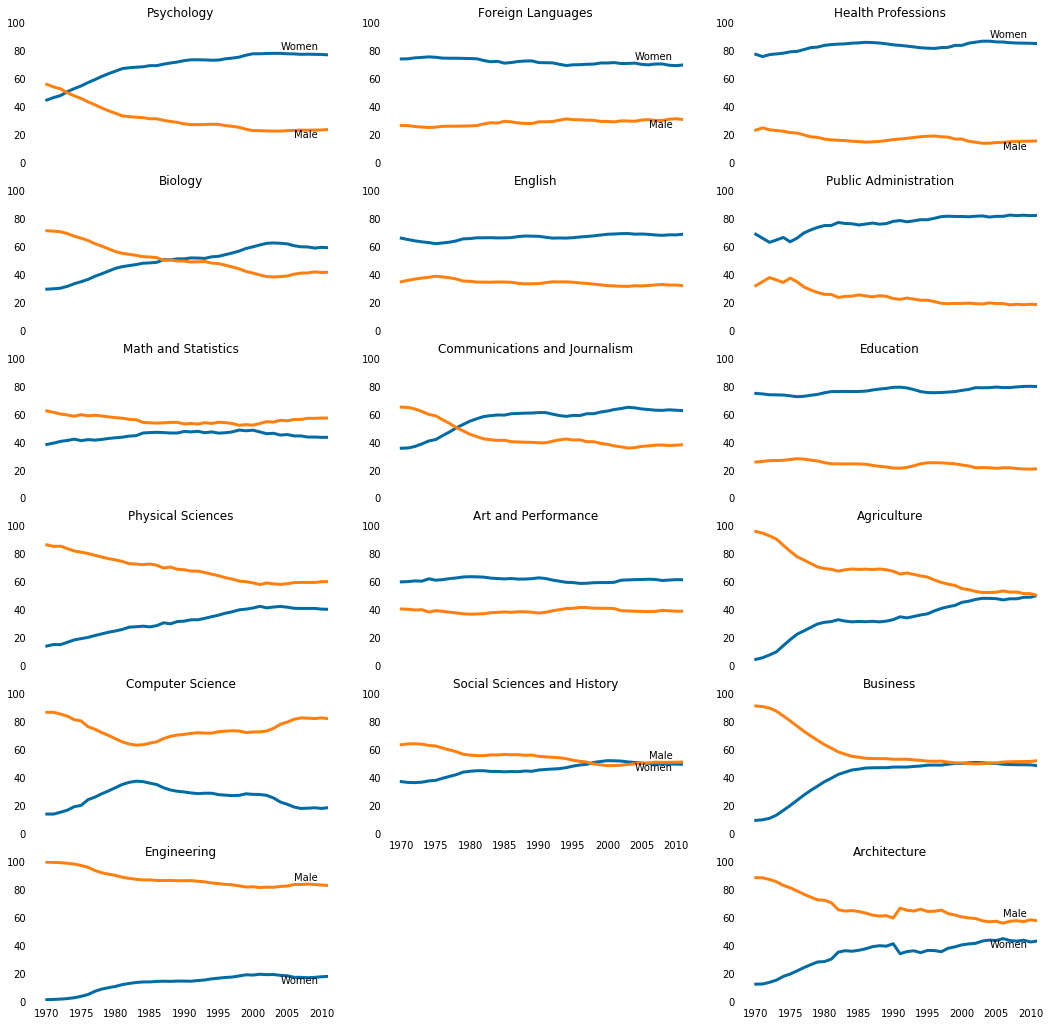

In [3]:
# get year column
year = women_degrees["Year"]

# categories of subjects
stem_cats = ['Psychology', 'Biology', 'Math and Statistics', \
             'Physical Sciences', 'Computer Science', 'Engineering']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', \
                 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', \
              'Agriculture','Business', 'Architecture']

# get last values for each category
stem_cats_lastVal = []
for i in stem_cats:
    lastVal_gendergap = abs(100 - ((women_degrees[i].tail(1).values) * 2))
    stem_cats_lastVal.append((i, lastVal_gendergap))

# sort stem_cats_lastVal (source https://stackoverflow.com/a/3121985/7194743)
stem_cats_lastVal = sorted(stem_cats_lastVal, key=lambda tup: tup[1], reverse=True)

# set line appearance
color_max = 255
women_color = tuple([i / color_max for i in [0, 107, 164]])
men_color = tuple([i / color_max for i in [255, 128, 14]])
linewidth = 3

# set figure dimensions
numRows = len(stem_cats)
numCols = 3

# crate a figure
fig = plt.figure(figsize=(18, 18))
# iterate over the length of subjects

for i in range(numRows * numCols):
    
    ind = i // numCols
    
    cat = None
    # get data to plot
    if i % 3 == 0:
        cat = stem_cats
    if i % 3 == 1:
        cat = lib_arts_cats
    if i % 3 == 2:
        cat = other_cats
    
    try:
        cat_data_f = women_degrees[cat[ind]]
        cat_data_m = 100 - cat_data_f
    except:
        continue
    
    # create subplot container
    ax = fig.add_subplot(numRows, numCols, i + 1)
    
    # create the subplot
    ax.plot(year, cat_data_f, c=women_color, linewidth=linewidth)
    ax.plot(year, cat_data_m, c=men_color, linewidth=linewidth)
    
    # set subplot title
    ax.set_title(cat[ind])
    
    # set axes ranges
    ax.set_ylim(top=100, bottom=0)
    ax.set_xlim(left=1968, right=2011)    
    
    # remove tickmarks
    ax.tick_params(top="off", bottom="off", left="off", right="off")
    
    # remove spines
    for key, val in ax.spines.items():
        val.set_visible(False)
    
    # leave x-axis tick labels only in the bottom plots
    labelbottom = "on" if ind == len(cat) - 1 else "off"
    ax.tick_params(labelbottom=labelbottom)    
    
    # insert annotations in first and last plot
    if (ind == 0) or (ind == len(cat) - 1):
        
        # get which group's last value is bigger
        above = cat_data_f if cat_data_f.iloc[-1] > cat_data_m.iloc[-1] else cat_data_m
        below = cat_data_m if above.equals(cat_data_f) else cat_data_f

        # for the bigger group with bigger last value, the annotation
        # comes above the line. The other group will have the annotation
        # below their line.
        
        # get indices where the last 20 percent of the lines begin
        above_last_20_ind = round(above.size * 0.2)
        below_last_20_ind = round(below.size * 0.2)
        
        # set annotations
        f = "Women"
        m = "Male"
        
        above_anno = f if above.equals(cat_data_f) else m
        below_anno = m if above_anno == f else f

        # set annotation positions above max and below min values 
        # in that last 20 percent of the lines
        above_pos_x = above.iloc[-above_last_20_ind:-1].max() + 3
        below_pos_x = below.iloc[-below_last_20_ind:-1].min() - 4
        
        year_last_20_ind = round(year.size * 0.2)
        year_last_20_val = year.iloc[-year_last_20_ind]

        above_pos_y = year_last_20_val if above_anno == f else year_last_20_val + 2
        below_pos_y = year_last_20_val if below_anno == f else year_last_20_val + 2
        
        # add annotations
        ax.text(above_pos_y, above_pos_x, above_anno)
        ax.text(below_pos_y, below_pos_x, below_anno)
    
# show plot
plt.show()

# 4. Setting y-axis labels

The figure will be cleaned further by reducing y-axis tick labels. Only 0 and 100 will be left.

The code from the previous step will be tweaked by adding `ax.set_yticks([0, 100])`.

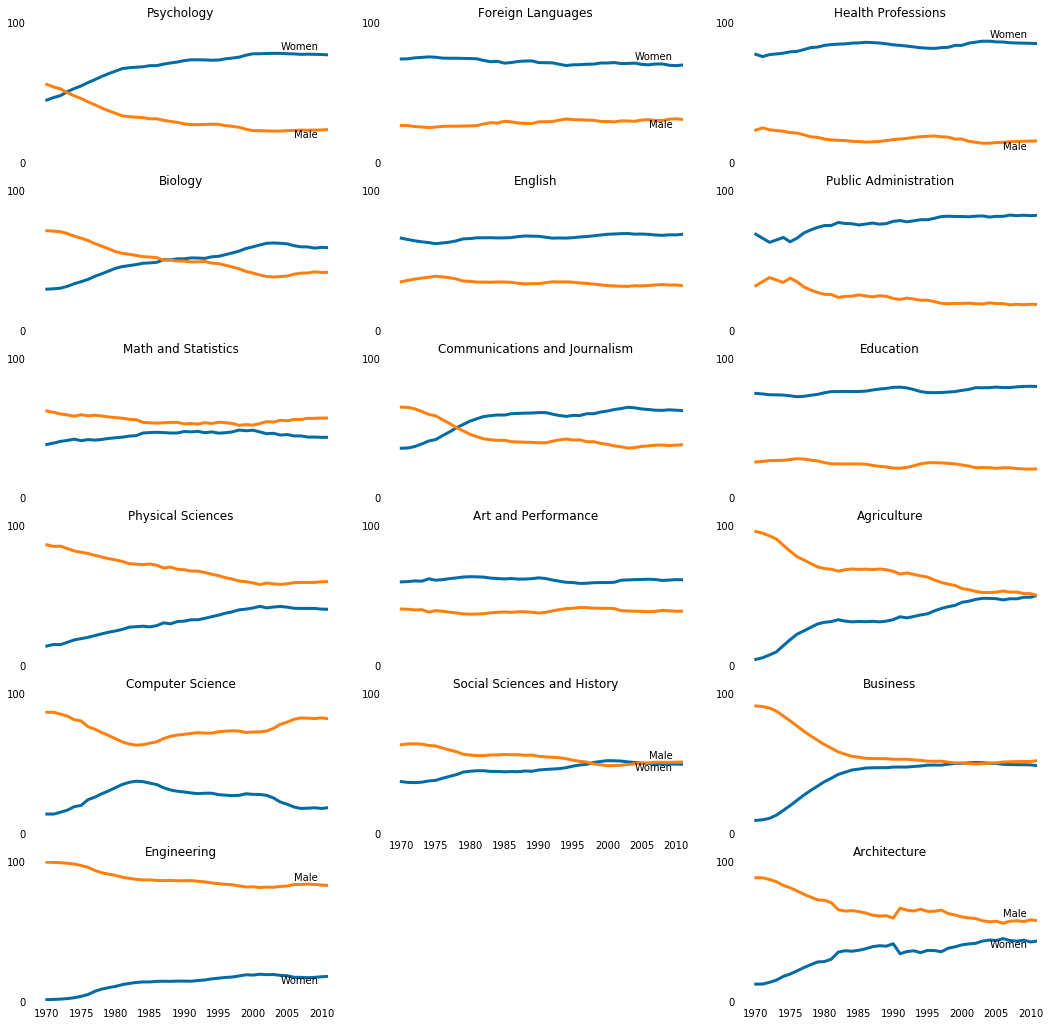

In [4]:
# get year column
year = women_degrees["Year"]

# categories of subjects
stem_cats = ['Psychology', 'Biology', 'Math and Statistics', \
             'Physical Sciences', 'Computer Science', 'Engineering']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', \
                 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', \
              'Agriculture','Business', 'Architecture']

# get last values for each category
stem_cats_lastVal = []
for i in stem_cats:
    lastVal_gendergap = abs(100 - ((women_degrees[i].tail(1).values) * 2))
    stem_cats_lastVal.append((i, lastVal_gendergap))

# sort stem_cats_lastVal (source https://stackoverflow.com/a/3121985/7194743)
stem_cats_lastVal = sorted(stem_cats_lastVal, key=lambda tup: tup[1], reverse=True)

# set line appearance
color_max = 255
women_color = tuple([i / color_max for i in [0, 107, 164]])
men_color = tuple([i / color_max for i in [255, 128, 14]])
linewidth = 3

# set figure dimensions
numRows = len(stem_cats)
numCols = 3

# crate a figure
fig = plt.figure(figsize=(18, 18))
# iterate over the length of subjects

for i in range(numRows * numCols):
    
    ind = i // numCols
    
    cat = None
    # get data to plot
    if i % 3 == 0:
        cat = stem_cats
    if i % 3 == 1:
        cat = lib_arts_cats
    if i % 3 == 2:
        cat = other_cats
    
    try:
        cat_data_f = women_degrees[cat[ind]]
        cat_data_m = 100 - cat_data_f
    except:
        continue
    
    # create subplot container
    ax = fig.add_subplot(numRows, numCols, i + 1)
    
    # create the subplot
    ax.plot(year, cat_data_f, c=women_color, linewidth=linewidth)
    ax.plot(year, cat_data_m, c=men_color, linewidth=linewidth)
    
    # set subplot title
    ax.set_title(cat[ind])
    
    # set axes ranges
    ax.set_ylim(top=100, bottom=0)
    ax.set_xlim(left=1968, right=2011)
    
    # reduce y-axis tick labels
    ax.set_yticks([0, 100])
    
    # remove tickmarks
    ax.tick_params(top="off", bottom="off", left="off", right="off")
    
    # remove spines
    for key, val in ax.spines.items():
        val.set_visible(False)
    
    # leave x-axis tick labels only in the bottom plots
    labelbottom = "on" if ind == len(cat) - 1 else "off"
    ax.tick_params(labelbottom=labelbottom)    
    
    # insert annotations in first and last plot
    if (ind == 0) or (ind == len(cat) - 1):
        
        # get which group's last value is bigger
        above = cat_data_f if cat_data_f.iloc[-1] > cat_data_m.iloc[-1] else cat_data_m
        below = cat_data_m if above.equals(cat_data_f) else cat_data_f

        # for the bigger group with bigger last value, the annotation
        # comes above the line. The other group will have the annotation
        # below their line.
        
        # get indices where the last 20 percent of the lines begin
        above_last_20_ind = round(above.size * 0.2)
        below_last_20_ind = round(below.size * 0.2)
        
        # set annotations
        f = "Women"
        m = "Male"
        
        above_anno = f if above.equals(cat_data_f) else m
        below_anno = m if above_anno == f else f

        # set annotation positions above max and below min values 
        # in that last 20 percent of the lines
        above_pos_x = above.iloc[-above_last_20_ind:-1].max() + 3
        below_pos_x = below.iloc[-below_last_20_ind:-1].min() - 4
        
        year_last_20_ind = round(year.size * 0.2)
        year_last_20_val = year.iloc[-year_last_20_ind]

        above_pos_y = year_last_20_val if above_anno == f else year_last_20_val + 2
        below_pos_y = year_last_20_val if below_anno == f else year_last_20_val + 2
        
        # add annotations
        ax.text(above_pos_y, above_pos_x, above_anno)
        ax.text(below_pos_y, below_pos_x, below_anno)
    
# show plot
plt.show()

# 5. Adding a horizontal line

As it is now more difficult to see the 50% line, we can add this.

Again, the code from the previous step will be tweaked.

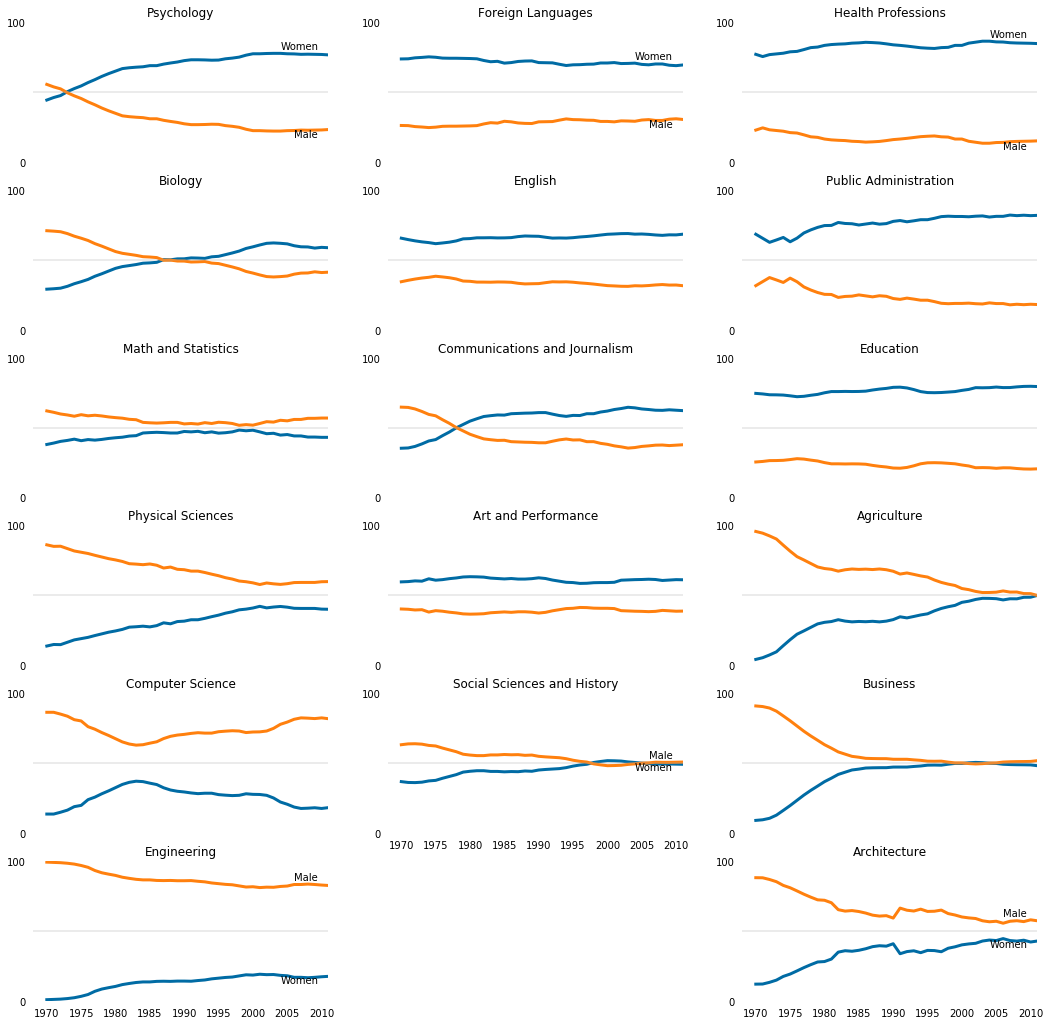

In [5]:
# get year column
year = women_degrees["Year"]

# categories of subjects
stem_cats = ['Psychology', 'Biology', 'Math and Statistics', \
             'Physical Sciences', 'Computer Science', 'Engineering']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', \
                 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', \
              'Agriculture','Business', 'Architecture']

# get last values for each category
stem_cats_lastVal = []
for i in stem_cats:
    lastVal_gendergap = abs(100 - ((women_degrees[i].tail(1).values) * 2))
    stem_cats_lastVal.append((i, lastVal_gendergap))

# sort stem_cats_lastVal (source https://stackoverflow.com/a/3121985/7194743)
stem_cats_lastVal = sorted(stem_cats_lastVal, key=lambda tup: tup[1], reverse=True)

# set line appearance
color_max = 255
women_color = tuple([i / color_max for i in [0, 107, 164]])
men_color = tuple([i / color_max for i in [255, 128, 14]])
linewidth = 3

# set figure dimensions
numRows = len(stem_cats)
numCols = 3

# crate a figure
fig = plt.figure(figsize=(18, 18))
# iterate over the length of subjects

for i in range(numRows * numCols):
    
    ind = i // numCols
    
    cat = None
    # get data to plot
    if i % 3 == 0:
        cat = stem_cats
    if i % 3 == 1:
        cat = lib_arts_cats
    if i % 3 == 2:
        cat = other_cats
    
    try:
        cat_data_f = women_degrees[cat[ind]]
        cat_data_m = 100 - cat_data_f
    except:
        continue
    
    # create subplot container
    ax = fig.add_subplot(numRows, numCols, i + 1)
    
    # create the subplot
    ax.plot(year, cat_data_f, c=women_color, linewidth=linewidth)
    ax.plot(year, cat_data_m, c=men_color, linewidth=linewidth)
    
    # set subplot title
    ax.set_title(cat[ind])
    
    # set axes ranges
    ax.set_ylim(top=100, bottom=0)
    ax.set_xlim(left=1968, right=2011)
    
    # reduce y-axis tick labels
    ax.set_yticks([0, 100])
    
    # remove tickmarks
    ax.tick_params(top="off", bottom="off", left="off", right="off")
    
    # remove spines
    for key, val in ax.spines.items():
        val.set_visible(False)
        
    # add horizontal line in the middle
    # color is the third on the "Color Blind 10" list from http://bit.ly/2AkjA4F.
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    
    # leave x-axis tick labels only in the bottom plots
    labelbottom = "on" if ind == len(cat) - 1 else "off"
    ax.tick_params(labelbottom=labelbottom)    
    
    # insert annotations in first and last plot
    if (ind == 0) or (ind == len(cat) - 1):
        
        # get which group's last value is bigger
        above = cat_data_f if cat_data_f.iloc[-1] > cat_data_m.iloc[-1] else cat_data_m
        below = cat_data_m if above.equals(cat_data_f) else cat_data_f

        # for the bigger group with bigger last value, the annotation
        # comes above the line. The other group will have the annotation
        # below their line.
        
        # get indices where the last 20 percent of the lines begin
        above_last_20_ind = round(above.size * 0.2)
        below_last_20_ind = round(below.size * 0.2)
        
        # set annotations
        f = "Women"
        m = "Male"
        
        above_anno = f if above.equals(cat_data_f) else m
        below_anno = m if above_anno == f else f

        # set annotation positions above max and below min values 
        # in that last 20 percent of the lines
        above_pos_x = above.iloc[-above_last_20_ind:-1].max() + 3
        below_pos_x = below.iloc[-below_last_20_ind:-1].min() - 4
        
        year_last_20_ind = round(year.size * 0.2)
        year_last_20_val = year.iloc[-year_last_20_ind]

        above_pos_y = year_last_20_val if above_anno == f else year_last_20_val + 2
        below_pos_y = year_last_20_val if below_anno == f else year_last_20_val + 2
        
        # add annotations
        ax.text(above_pos_y, above_pos_x, above_anno)
        ax.text(below_pos_y, below_pos_x, below_anno)
    
# show plot
plt.show()

# 6. Exporting to a file

The code from the previous step will be modified to save the figure using `Figure.savefig()` or `pyplot.savefig()`

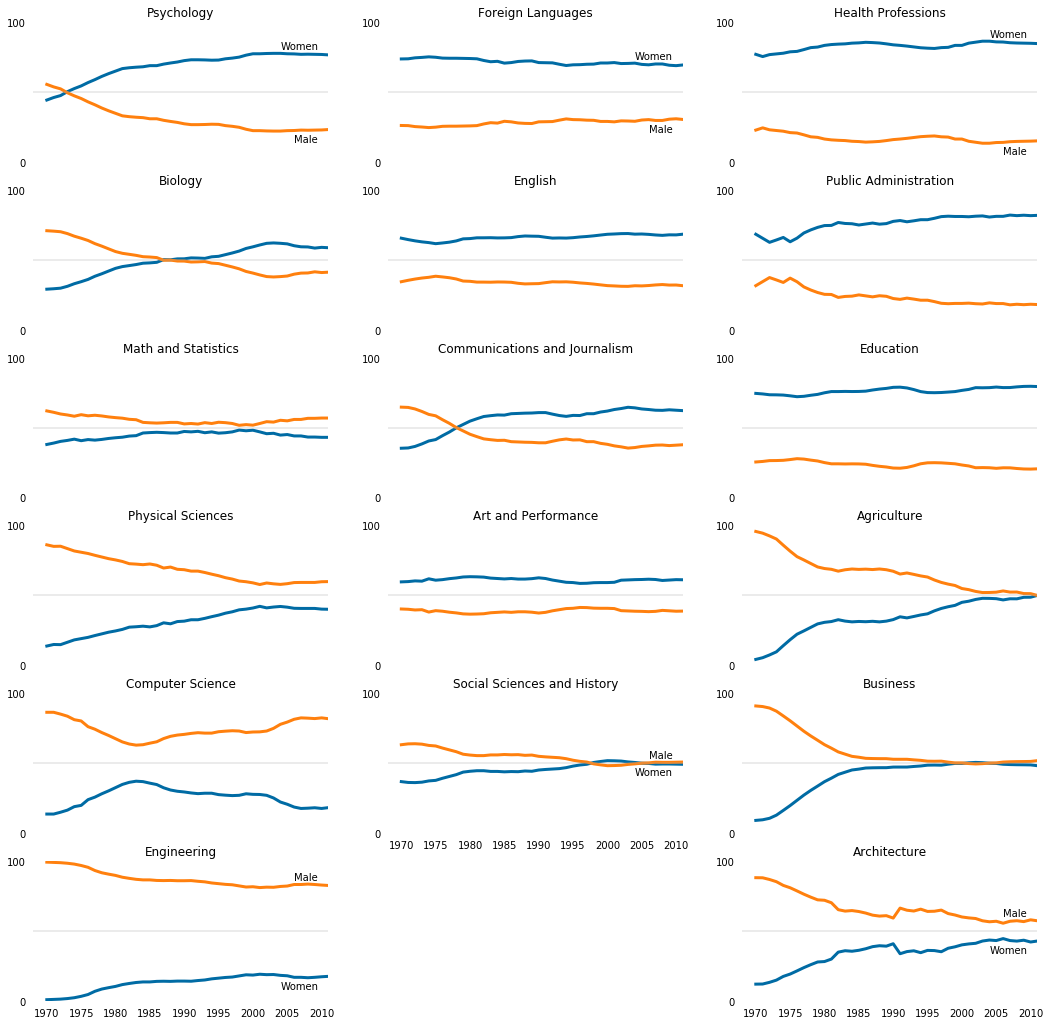

In [6]:
# get year column
year = women_degrees["Year"]

# categories of subjects
stem_cats = ['Psychology', 'Biology', 'Math and Statistics', \
             'Physical Sciences', 'Computer Science', 'Engineering']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', \
                 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', \
              'Agriculture','Business', 'Architecture']

# get last values for each category
stem_cats_lastVal = []
for i in stem_cats:
    lastVal_gendergap = abs(100 - ((women_degrees[i].tail(1).values) * 2))
    stem_cats_lastVal.append((i, lastVal_gendergap))

# sort stem_cats_lastVal (source https://stackoverflow.com/a/3121985/7194743)
stem_cats_lastVal = sorted(stem_cats_lastVal, key=lambda tup: tup[1], reverse=True)

# set line appearance
color_max = 255
women_color = tuple([i / color_max for i in [0, 107, 164]])
men_color = tuple([i / color_max for i in [255, 128, 14]])
linewidth = 3

# set figure dimensions
numRows = len(stem_cats)
numCols = 3

# crate a figure
fig = plt.figure(figsize=(18, 18))
# iterate over the length of subjects

for i in range(numRows * numCols):
    
    ind = i // numCols
    
    cat = None
    # get data to plot
    if i % 3 == 0:
        cat = stem_cats
    if i % 3 == 1:
        cat = lib_arts_cats
    if i % 3 == 2:
        cat = other_cats
    
    try:
        cat_data_f = women_degrees[cat[ind]]
        cat_data_m = 100 - cat_data_f
    except:
        continue
    
    # create subplot container
    ax = fig.add_subplot(numRows, numCols, i + 1)
    
    # create the subplot
    ax.plot(year, cat_data_f, c=women_color, linewidth=linewidth)
    ax.plot(year, cat_data_m, c=men_color, linewidth=linewidth)
    
    # set subplot title
    ax.set_title(cat[ind])
    
    # set axes ranges
    ax.set_ylim(top=100, bottom=0)
    ax.set_xlim(left=1968, right=2011)
    
    # reduce y-axis tick labels
    ax.set_yticks([0, 100])
    
    # remove tickmarks
    ax.tick_params(top="off", bottom="off", left="off", right="off")
    
    # remove spines
    for key, val in ax.spines.items():
        val.set_visible(False)
        
    # add horizontal line in the middle
    # color is the third on the "Color Blind 10" list from http://bit.ly/2AkjA4F.
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    
    # leave x-axis tick labels only in the bottom plots
    labelbottom = "on" if ind == len(cat) - 1 else "off"
    ax.tick_params(labelbottom=labelbottom)    
    
    # insert annotations in first and last plot
    if (ind == 0) or (ind == len(cat) - 1):
        
        # get which group's last value is bigger
        above = cat_data_f if cat_data_f.iloc[-1] > cat_data_m.iloc[-1] else cat_data_m
        below = cat_data_m if above.equals(cat_data_f) else cat_data_f

        # for the bigger group with bigger last value, the annotation
        # comes above the line. The other group will have the annotation
        # below their line.
        
        # get indices where the last 20 percent of the lines begin
        above_last_20_ind = round(above.size * 0.2)
        below_last_20_ind = round(below.size * 0.2)
        
        # set annotations
        f = "Women"
        m = "Male"
        
        above_anno = f if above.equals(cat_data_f) else m
        below_anno = m if above_anno == f else f

        # set annotation positions above max and below min values 
        # in that last 20 percent of the lines
        above_pos_x = above.iloc[-above_last_20_ind:-1].max() + 3
        below_pos_x = below.iloc[-below_last_20_ind:-1].min() - 8
        
        year_last_20_ind = round(year.size * 0.2)
        year_last_20_val = year.iloc[-year_last_20_ind]

        above_pos_y = year_last_20_val if above_anno == f else year_last_20_val + 2
        below_pos_y = year_last_20_val if below_anno == f else year_last_20_val + 2
        
        # add annotations
        ax.text(above_pos_y, above_pos_x, above_anno)
        ax.text(below_pos_y, below_pos_x, below_anno)

# save figure (can also be done with fig.savefig())
plt.savefig("gender_degrees.png")

# show plot
plt.show()

This is the end of this guided project.

Below are some notes for myself regarding matplotlib's backend.


# Note: Access and adjust matplotlib backend



Although not often, it may be necessary to access and/or change matplotlib backend. Below is a [paragraph from DataQuest](https://www.dataquest.io/m/149/guided-project%3A-visualizing-the-gender-gap-in-college-degrees/6/exporting-to-a-file), regarding matplotlib's backend.

"If you recall, matplotlib can be used many different ways. It can be used within a Jupyter Notebook interface (like this one), from the command line, or in an integrated development environment. Many of these ways of using matplotlib vary in workflow and handle the rendering of images differently as well. To help support these different use cases, matplotlib can target different outputs or **backends**.

The code below shows currently used matplotlib backend can be checked.

In [7]:
# get backend of matplotlib
import matplotlib
matplotlib.get_backend()

'module://ipykernel.pylab.backend_inline'

Available backends can be listed as well.

In [8]:
# display interactive backends
print("Interactive backends")
print(matplotlib.rcsetup.interactive_bk)
print("")

# display non-interactive backends
print("Non-interactive backends")
print(matplotlib.rcsetup.non_interactive_bk)
print("")

# display both interactive and non-interactive backends
print("Both interactive and non-interactive backends")
print(matplotlib.rcsetup.all_backends)

Interactive backends
['GTK', 'GTKAgg', 'GTKCairo', 'MacOSX', 'Qt4Agg', 'Qt5Agg', 'TkAgg', 'WX', 'WXAgg', 'GTK3Cairo', 'GTK3Agg', 'WebAgg', 'nbAgg']

Non-interactive backends
['agg', 'cairo', 'gdk', 'pdf', 'pgf', 'ps', 'svg', 'template']

Both interactive and non-interactive backends
['GTK', 'GTKAgg', 'GTKCairo', 'MacOSX', 'Qt4Agg', 'Qt5Agg', 'TkAgg', 'WX', 'WXAgg', 'GTK3Cairo', 'GTK3Agg', 'WebAgg', 'nbAgg', 'agg', 'cairo', 'gdk', 'pdf', 'pgf', 'ps', 'svg', 'template']


For further info including how to change the backend, see https://matplotlib.org/faq/usage_faq.html#what-is-a-backend.